In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
plt.rc('font', family = 'malgun gothic')
plt.rcParams['axes.unicode_minus'] = False

# L2 규제

* L2 규제는 3차원 loss surface에서 파라미터 공간의 크기를 제한하여 일반화 성능을 높이는 효과가 있습니다. 3차원 공간에서 파라미터 w1, w2, loss 값을 각각 x, y, z축으로 나타낼 수 있습니다.

* 만약 L2 규제가 적용되지 않은 경우, loss surface는 규제가 없는 매끄러운 곡면으로 나타납니다. 이 경우 파라미터 공간에서 어디에서나 손실 함수를 최적화할 수 있는 포인트가 있습니다. 그러나 이렇게 학습한 모델은 새로운 데이터에서 성능이 좋지 않을 수 있습니다.

* 반면에 L2 규제를 적용하면, loss surface는 구부러진 형태를 가지게 됩니다. L2 규제는 파라미터 w1, w2의 크기에 대한 제한을 가하는데, 이로 인해 파라미터 공간의 크기가 작아집니다. 이는 일종의 "파라미터의 수용력(capacity)"을 줄이는 효과가 있습니다. 이러한 규제는 loss surface에서 전체적으로 규제가 생기게 됩니다. 그 결과, 규제가 없는 loss surface보다 최적화되기 더 어려운 포인트가 존재합니다. 따라서 모델은 더 많은 데이터에 일반화되는 경향이 있습니다.

* 결론적으로, L2 규제는 3차원 loss surface에서 파라미터 공간의 크기를 제한하여 모델의 일반화 성능을 높이는 효과가 있습니다

### 실제 예제 데이터를 만들어 Loss surface를 살펴보자 

In [195]:
x1 = np.linspace(0,100,100).reshape(-1,1)
x2 = np.linspace(0,100,100).reshape(-1,1)

error = (np.random.randn(100) * 100).reshape(-1,1)

weights = np.array([5.4,3.9]).reshape(-1,1)

Y = x1*weights[0] + x2*weights[1] + error # 가중치가  두 개인 예제 회귀 모형 생성 
Y = Y.reshape(-1,1)

In [196]:
def make_3dplot(x,y,z):
    
    
    fig = plt.figure(figsize = (5,5))
    ax = fig.add_subplot(projection = '3d')


    ax.scatter(x,y,z)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('Y')


        
    return ax

Text(0.5, 0.92, '실제값의 산점도')

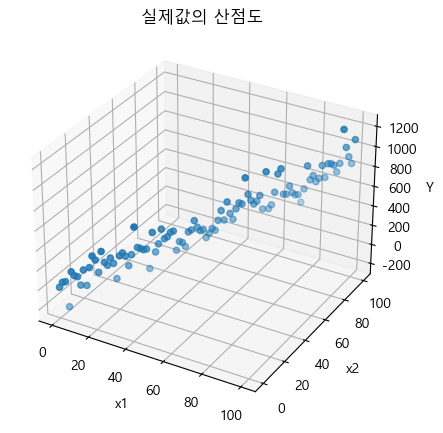

In [197]:
ax = make_3dplot(x1,x2,Y)
ax.set_title('실제값의 산점도')

In [198]:
def loss_function(y,predicted):
    
    m = len(y)
    
    SSE = np.sum((y - predicted)**2)
    
    return 1/m * SSE

In [207]:
# 가중치 범위 설정

w1_list = np.linspace(-15, 30, 1000)
w2_list = np.linspace(-15, 30, 1000)

# 손실 함수 계산
losses = np.zeros((1000, 1000))
for i, w1 in enumerate(w1_list):
    for j, w2 in enumerate(w2_list):
        predicted = x1 * w1 + x2 * w2
        losses[i, j] = loss_function(Y, predicted.reshape(-1, 1))
        
w1_list, w2_list = np.meshgrid(w1_list, w2_list)

In [208]:
def make_3d_surface(x,y,z):
    
    fig,ax = plt.subplots(ncols = 3, subplot_kw = {'projection':'3d'},
                            figsize = (20,5))
    
    
    ax[0].plot_surface(x,y,z,
                    cmap = 'Blues_r')
    ax[0].set_xlabel('W1')
    ax[0].set_ylabel('W2')
    ax[0].set_zlabel('Loss')
    ax[0].view_init(10,15)
        
    ax[1].plot_surface(x,y,z,
                    cmap = 'Blues_r')
    ax[1].set_xlabel('W1')
    ax[1].set_ylabel('W2')
    ax[1].set_zlabel('Loss')
    ax[1].view_init(45,30)
    
    ax[2].plot_surface(x,y,z,
                    cmap = 'Blues_r')
    ax[2].set_xlabel('W1')
    ax[2].set_ylabel('W2')
    ax[2].set_zlabel('Loss')
    ax[2].view_init(10,90)
    

    
    return fig,ax

Text(0.5, 0.98, 'Weights 값에 따른 Loss function Surface')

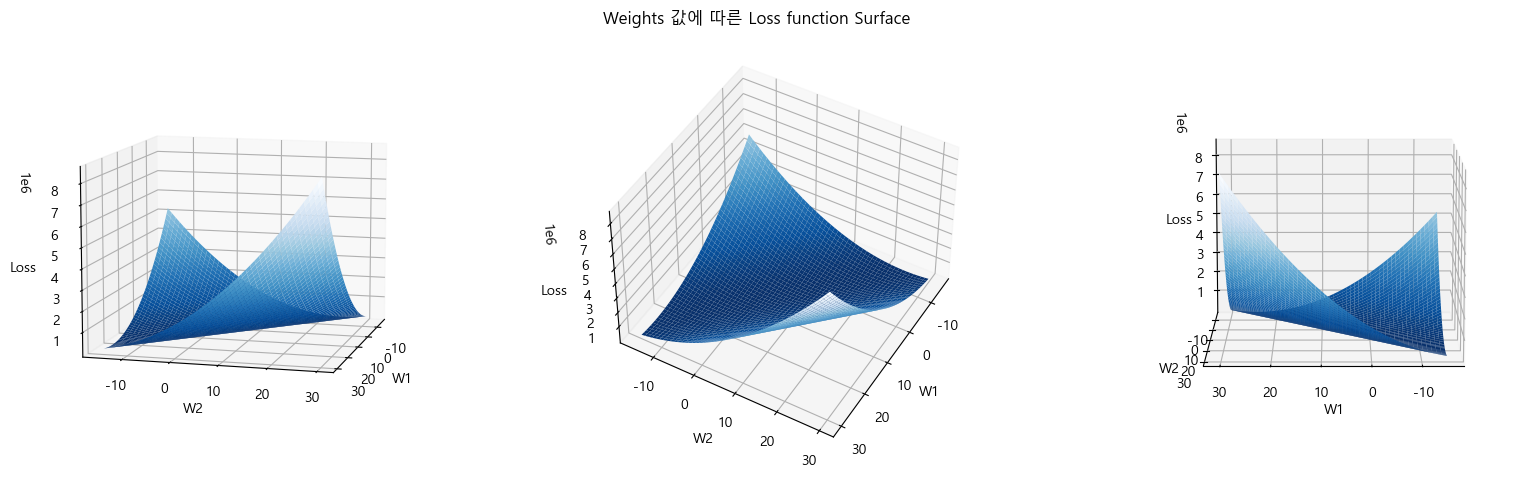

In [209]:
fig , ax = make_3d_surface(w1_list,w2_list,losses)

fig.suptitle('Weights 값에 따른 Loss function Surface')